# Predicting prices on housing market in Melbourne - Capstone Project
## Part 1: Data cleansing

In [0]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [4]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [0]:
df.shape

(34857, 21)

## Use Case
The aim of this project is predicting the prices on housing market in Melbourne, Australia. This problem is rather popular and real estate market is the interest of many people at some point of their lives. Since it's a real-life problem, I consider it to be perfect for a capstone project - it may be a warm-up for future projects of applying these skills to other markets in different countries.

## Data Source
Data was collected from Kaggle and is available here:

https://www.kaggle.com/anthonypino/melbourne-housing-market

This one was chosen, because the dataset is quite big what makes it good for building models. Also, Kaggle enables fast downloading the data - it's in csv file, so it's just one file to download and we have access to much information. That was a big advantage over gathering data through APIs or web-scraping.

What describes each observation in a dataset:
*   Suburb - suburb in which property is located
*   Address - complete address of a property
*   Rooms - number of rooms in the property
*   Type - type of property: u - unit, h - house, t- townhouse
*   Price - price of property (target variable)
*   Method - method sold (not fully descriped)
*   SellerG - name of person conducting the selling
*   Date - date of selling
*   Distance - distance between city centre and a property
*   Postcode - postcode of property location
*   Bedroom2 - number of bedroom (maybe additional bedroom? - not described)
*   Bathroom - number of bathrooms
*   Car - number of places to park a car
*   Landsize - landsize area of property
*   BuildingArea - building area of property
*   YearBuilt - year of building a property
*   CouncilArea - council area of property
*   Lattitude 
*   Longtitude
*   Regionname - region of property
*   Propertycount - not discribed, hard to say

### Data cleansing
#### Data types
First, let's check the datatypes of each column:

In [0]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

Almost everything seems to be correct. 'Date' column needs to be converted to datetime.

In [0]:
# changing column type from object to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

Then, since we should not conduct any mathematical computations on post codes, we will convert them to strings - this way they will be treated as a category.

In [0]:
# converting postcode to string
df['Postcode'] = df['Postcode'].astype('object')

Making sure everything is correct:

In [7]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

#### Ranges
We are checking if the data distribution in each column is correct. First, the numeric values:

In [8]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Number of rooms seem to be correct - mean is around 3 and so is median, minimum equals 1 (which is correct since there has to be at least one room in a house). Price also seems to be correct. Distance varies from 0 to 48, which should be correct - the column describes distance from the city centre. Number of bedroom is interesting - since minimmum value is 0, I interpret this columns as 'additional bedroom number', because it is rather impossible for house to have none bedroom. Also, the maximum value of 30, which is higher than maximum of rooms, indicated some issues with data. For bathroom - there are some houses with no bathroom; it should be further investigated to make sure it is not mistaken value. Landsizes vary considerably and so is building area. Year built defenitely needs fixing, since maximum value stands for a year in the future. Longitudes and latitues have correct ranges. Property count is a mysterious column - its distribution doesn't explain variable's role. At this point, the column will be probably excluded from the constructed model, because we don't know its meaning.

Let's start with checking bedroom2.

First, I want to see if Bedroom2 equal 0 is the indicator of a studio flat.

In [9]:
# getting rows where Bedroom2 is zero
df[df['Bedroom2'] == 0][['Rooms', 'Price', 'Bedroom2', 'Bathroom']]

,Rooms,Price,Bedroom2,Bathroom
218,2,650000.0,0.0,1.0
1390,3,830000.0,0.0,2.0
1424,3,1355000.0,0.0,1.0
1549,3,700000.0,0.0,0.0
3717,3,NaN,0.0,0.0
3812,2,410000.0,0.0,0.0
5547,4,2400000.0,0.0,2.0
10107,3,1560000.0,0.0,2.0
11193,2,872000.0,0.0,0.0
11234,3,585000.0,0.0,1.0


There is no logic behind zero bedrooms. In every case there are two or more rooms, it is hard to say if bedroom is included or not. The conclusion is that zero could be changed into missing values, because it is simply misleading.

Next, I am checking houses with none bathrooms.

In [10]:
# getting rows where number of bathrooms is zero
df[df['Bathroom'] == 0][['Rooms', 'Price', 'Bedroom2', 'Bathroom']]

,Rooms,Price,Bedroom2,Bathroom
228,3,1485000.0,3.0,0.0
481,2,546000.0,2.0,0.0
845,2,497500.0,2.0,0.0
1009,2,1010000.0,2.0,0.0
1549,3,700000.0,0.0,0.0
1772,3,1900000.0,3.0,0.0
1784,3,1067000.0,3.0,0.0
2716,4,1400000.0,3.0,0.0
2853,3,NaN,3.0,0.0
3717,3,NaN,0.0,0.0


Here, as well, zero bathrooms seem to occur by accident. There is no correlation with price nor with number of rooms. Also, Melbourne is a big modern city, so I would not expect houses without bathroom there. I am turning zeros in both bedrooms and bathrooms into NaNs.

In [0]:
# replacing 0 with nan for bedroom and bathroom columns
df['Bedroom2'].replace(0, np.nan, inplace=True)
df['Bathroom'].replace(0, np.nan, inplace=True)

Another column that has peculiar range is YearBuilt. I want to see all the rows with false values - dataset is from January 2016, so I consider all the rows containing YearBuilt higher than 2016 possibly mistaken.

In [12]:
# getting rows with odd year of building
df[df['YearBuilt'] > 2016]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
750,Avondale Heights,157 Canning St,3,t,851000.0,S,Nelson,2016-03-12,10.5,3034,3.0,3.0,1.0,557.0,181.0,2017.0,Moonee Valley City Council,-37.77000,144.85720,Western Metropolitan,4502.0
2096,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,2016-09-24,10.7,3187,4.0,3.0,2.0,302.0,250.0,2018.0,Bayside City Council,-37.91820,145.02310,Southern Metropolitan,6938.0
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,2016-07-11,11.8,3105,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480.0
4758,Glenroy,2 Roy St,4,h,550000.0,VB,Peter,2017-04-03,13.0,3046,4.0,2.0,1.0,683.0,138.0,2017.0,Moreland City Council,-37.69640,144.93140,Northern Metropolitan,8870.0
4882,Glenroy,40 Augustine Tce,3,h,NaN,SN,Melbourne,2016-07-26,13.0,3046,3.0,1.0,1.0,707.0,116.0,2017.0,Moreland City Council,-37.69870,144.91040,Northern Metropolitan,8870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34486,Mernda,12 Friesian St,4,h,535000.0,S,HAR,2018-02-24,25.9,3754,4.0,2.0,2.0,294.0,NaN,2017.0,Whittlesea City Council,-37.58651,145.08104,Northern Metropolitan,5812.0
34534,Moorabbin,20b Grandview Gr,4,t,1250000.0,VB,Buxton,2018-02-24,14.3,3189,4.0,3.0,2.0,339.0,262.0,2017.0,Kingston City Council,-37.94372,145.04611,Southern Metropolitan,2555.0
34559,Murrumbeena,43b Kinlock Av,3,t,1325000.0,S,Buxton,2018-02-24,10.1,3163,3.0,2.0,1.0,287.0,225.0,2017.0,Glen Eira City Council,-37.90522,145.07109,Southern Metropolitan,4442.0
34760,Sunshine North,40 Warwick Rd,3,h,890000.0,S,Ray,2018-02-24,10.5,3020,3.0,2.0,2.0,695.0,153.0,2018.0,Brimbank City Council,-37.76883,144.83974,Western Metropolitan,4217.0


Many rows contain 2017 as year of building. Assuming the dataset include offers from primary market, I am accepting all rows with YearBuilt lower than 2020.

In [13]:
# getting rows with too late year of built
df[df['YearBuilt'] > 2020]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,2016-07-11,11.8,3105,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


There is only one row with odd year. It might have been mistyped - probably it's 2106 instead of 2016.

Also, there is strange minimum in the column. There shouldn't be any offers of houses in Australia built before 1800.

In [14]:
# getting rows with too soon year of built
df[df['YearBuilt'] < 1800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149,3.0,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0


Again, it may have been mistyped. However I cannot be sure, so in both cases I am going to replace wrong values with NaNs.

In [0]:
# replacing wrong values with NaNs
df[df['YearBuilt'] < 1800] = np.nan
df[df['YearBuilt'] > 2020] = np.nan

All the numeric columns have been cleansed. As said before, I am going to drop Propertycount, since it's meaning is hard to understand - it won't be useful while modelling.

In [16]:
# dropping redundant column
df = df.drop(columns=['Propertycount'])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,2016-03-09,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,2016-04-02,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan


In [24]:
df.select_dtypes(exclude=['object', 'datetime']).columns[:-2]

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


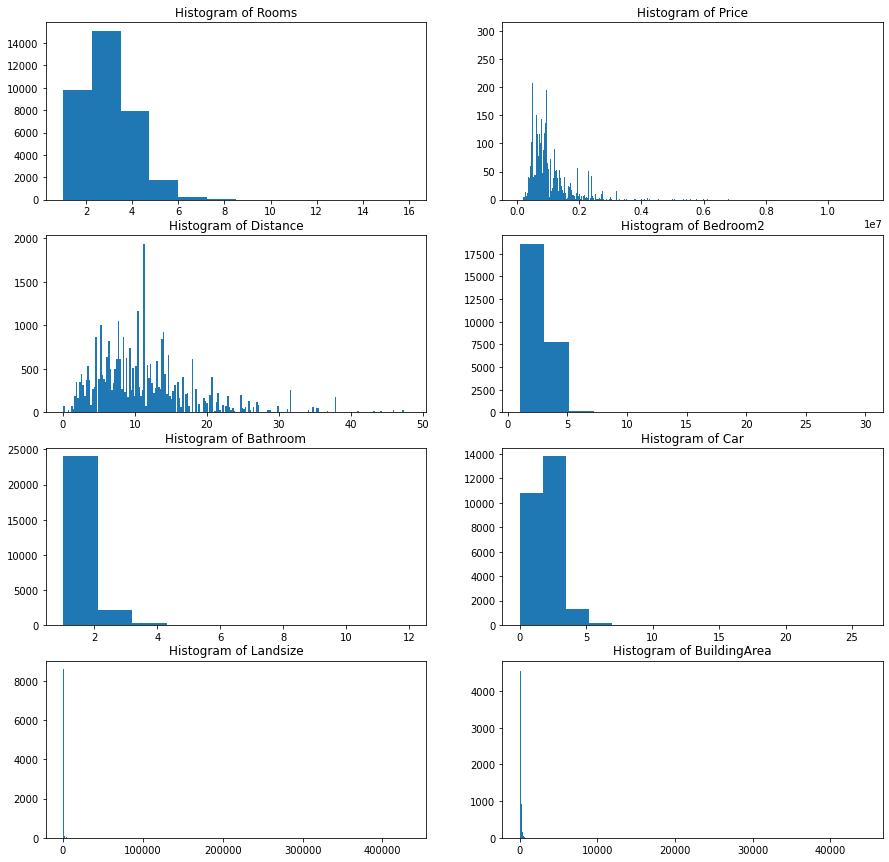

In [25]:
# plotting histograms of some numerical variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
axs = axes.flatten()

# values from numeric columns
cols = [df[col] for col in df.select_dtypes(exclude=['object', 'datetime']).columns[:-2]]
# number of bins for each histogram
bins = [i.nunique() for i in cols]

for n in range(0, len(axs)):
    axs[n].hist(cols[n], bins=bins[n])
    axs[n].set_title('Histogram of {}'.format(cols[n].name))
plt.show()

Histograms show that ranges are reasonable, however there are many outliers in the dataset, especially in BuildingArea and Landsize columns.

At the end, I am checking the range of data to know what period of time the offers come from.

In [26]:
df['Date'].min(), df['Date'].max()

(Timestamp('2016-01-28 00:00:00'), Timestamp('2018-10-03 00:00:00'))

That's a surprise - the Kaggle page claims data is from January 2016, but in fact it describes the market after this month. This explains YearBuilt of 2017 and 2018. Luckily, this data was not dropped.

#### Emptiness
Now I am looking for empty values in a dataset. 

In [27]:
# getting number of missing values
df.isna().sum()

Suburb              2
Address             2
Rooms               2
Type                2
Price            7611
Method              2
SellerG             2
Date                2
Distance            3
Postcode            3
Bedroom2         8236
Bathroom         8274
Car              8730
Landsize        11812
BuildingArea    21117
YearBuilt       19308
CouncilArea         5
Lattitude        7978
Longtitude       7978
Regionname          5
dtype: int64

Every column include some missing values. I will proccess them later, but for now I have to drop all the rows with missing prices. This is the target variable, so nulls will not be useful while building a prediction model.

In [0]:
# drop missing prices
df = df.dropna(subset=['Price'])

In [29]:
# check changes of NaNs
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         6457
Bathroom         6481
Car              6824
Landsize         9265
BuildingArea    16591
YearBuilt       15163
CouncilArea         3
Lattitude        6254
Longtitude       6254
Regionname          3
dtype: int64

After removving unuseful rows, missing values in columns other than Price disappeared as well. Some of them still have many empty fields, but this problem will be solved during feature creation step.

In [30]:
df.shape

(27246, 20)

#### Uniqueness
I am making sure there are no duplicated rows.

In [31]:
df.duplicated().sum()

0

This is a very satisfying result - there are no duplicated rows.

#### Set memberships
What I am checking here is whether only allowed values are chosen for categorical fields. I am starting that by checking unique values for non-numeric columns.

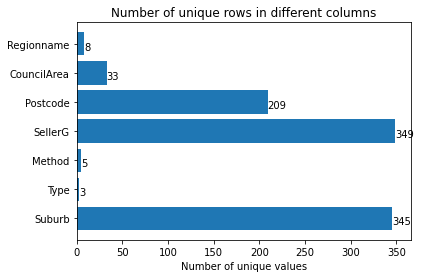

In [32]:
df_strings = df.select_dtypes(include=['object'])

df_no_address = df_strings.drop(columns=['Address'])
locations = [i for i in range(df_no_address.shape[1])]
heights = [df_no_address[i].nunique() for i in df_no_address.columns]
labels = df_no_address.columns

plt.barh(locations, heights, tick_label=labels)
plt.title('Number of unique rows in different columns')
plt.xlabel('Number of unique values')
for i in locations:
    plt.annotate(heights[i], (heights[i], i-0.2))
plt.show()

Address column was excluded from the chart due to huge number of unique values - that would distort the plot. Now, let's take a look into the respective variables.

In [0]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

All of the regions seem to be correctly formatted. This column is well prepared.

In [0]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Macedon Ranges Shire Council', 'Yarra Ranges Shire Council',
       'Wyndham City Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', nan, 'Mitchell Shire Council'],
      dtype=object)

Council areas also look fine. 

In [0]:
df['Postcode'].unique()

array([3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025.0, 3143.0, 3032.0,
       3147.0, 3034.0, 3183.0, 3103.0, 3104.0, 3204.0, 3165.0, 3128.0,
       3019.0, 3186.0, 3187.0, 3056.0, 3055.0, 3105.0, 3125.0, 3124.0,
       3126.0, 3054.0, 3163.0, 3162.0, 3161.0, 3148.0, 3068.0, 3058.0,
       3066.0, 3108.0, 3084.0, 3185.0, 3184.0, 3040.0, 3041.0, 3065.0,
       3031.0, 3011.0, 3146.0, 3046.0, 3043.0, 3188.0, 3122.0, 3081.0,
       3166.0, 3079.0, 3021.0, 3033.0, 3101.0, 3102.0, 3144.0, 3012.0,
       3145.0, 3000.0, 3127.0, 3039.0, 3189.0, 3015.0, 3051.0, 3070.0,
       3167.0, 3052.0, 3044.0, 3207.0, 3181.0, 3072.0, 3073.0, 3121.0,
       3205.0, 3141.0, 3006.0, 3182.0, 3020.0, 3107.0, 3071.0, 3142.0,
       3087.0, 3003.0, 3016.0, 3085.0, 3013.0, 3057.0, 3061.0, 3053.0,
       3002.0, 3060.0, 3123.0, 3047.0, 3083.0, 3008.0, 3022.0, 3049.0,
       3153.0, 3193.0, 3806.0, 3130.0, 3155.0, 3088.0, 3023.0, 3151.0,
       3192.0, 3978.0, 3064.0, 3977.0, 3136.0, 3175.0, 3089.0, 3172.0,
      

One glance is enough to see that all postcodes consist of four digits - here formatting also doesn't need to be fixed.

Next column, SellerG, is more demanding because of 349 unique inputs. These are surnames, so it's also difficult to estimate if they are correct or not. I can however check if it is well formatted in matters of upper and lowercase - if written differently, it is counted as different sellers only due to a little mistake.

I am doing so by converting all sellers into uppercase strings and counting unique values then. If it differs from number of unique values in column, some errors occur.

In [0]:
# count number of unique values of uppercase sellers
len({i.upper() for i in df['SellerG']})

345

Four values are sometimes differently formatted. To correct that, I am transforming column's inputs into uppercase strings.

In [0]:
# transforming sellers' names to uppercase
df['SellerG'] = df['SellerG'].str.upper()

df['SellerG'].nunique()

345

After fixing that, the column shouldn't need any cleaning.

In [0]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

There are five different methods - because of lack of precise data description, I am not able to estimate if these values are enough.

In [0]:
df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

Three types, as expected - house, townhouse, unit.

In [0]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

Suburbs again are hard to check. Just looking at the data, I can't notice any specific problems.

#### Cross-field validation
Some fields impact validity of others. I am going to investigate that.

At the very beginning I noticed odd numbers of rooms, bedrooms and bathrooms. Zeros were erased from dataframe, but still it is a good idea to check whether number of bathrooms in the house is not bigger than rooms, etc.

In [0]:
len(df.query("Bedroom2 > Rooms"))

221

In [0]:
len(df.query("Bathroom > Rooms"))

36

The dataset contains over 20 thousands of offers, so these are just a tiny percentage of all rows. I can drop them, because they are not truthful.

In [0]:
# deleting misleading rows
df = df.drop(df.query("Bathroom > Rooms").index)
df = df.drop(df.query("Bedroom2 > Rooms").index)

What are new dataframe dimensions?

In [0]:
df.shape

(27001, 20)

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,BIGGIN,2016-03-12,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,BIGGIN,2016-04-02,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,BIGGIN,2017-04-03,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,BIGGIN,2017-04-03,2.5,3067,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,NELSON,2016-04-06,2.5,3067,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


That would be all for the data cleansing step. Next, initial data analysis will be conducted. I am creating a csv file with cleansed data to make future work easier.

In [0]:
df.to_csv('data_cleansed.csv', index=False)